# Geospatial Data in Python

## Vector Data

We are going to use [geopandas](https://geopandas.org/) to work with some vector data layers.  Geopandas is built on top of pandas, the main addition is its ability to handle **Geometries**.  For this, it relies on another package called [shapely](https://shapely.readthedocs.io/en/stable/manual.html)


Text(0.5, 1.0, 'Verticies')

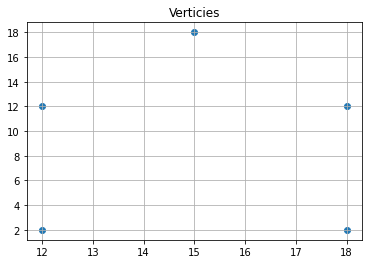

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd


%matplotlib inline

Y = np.array([2,12,18,12,2])
X = np.array([12,12,15,18,18])

fig,ax=plt.subplots()
ax.scatter(X,Y)
ax.grid()
ax.set_title('Verticies')

In [43]:
from shapely.geometry import Polygon, LineString, Point


## Shapely Objects

### Point(s)

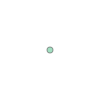

In [44]:
from shapely.geometry import Point

point = Point([X[0],Y[0]])

point

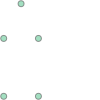

In [45]:
from shapely.geometry import MultiPoint

mulit_point = MultiPoint([x for x in zip(X, Y)])

mulit_point

### Polygon(s)

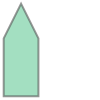

In [46]:
from shapely.geometry import Polygon

poly = Polygon([coord for coord in zip(X, Y)])

poly

[<shapely.geometry.polygon.Polygon object at 0x0000020B4E2F5640>, <shapely.geometry.polygon.Polygon object at 0x0000020B4E31AB80>, <shapely.geometry.polygon.Polygon object at 0x0000020B4A8649D0>, <shapely.geometry.polygon.Polygon object at 0x0000020B4A864A60>]


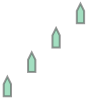

In [47]:
from shapely.geometry import MultiPolygon

Mpol = []
for i in range(0,61,20):
    Mpol.append(Polygon([coord for coord in zip(X+i, Y+i)]))

print(Mpol)
Mpoly = MultiPolygon(Mpol)

Mpoly

### Line(s)

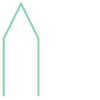

In [48]:
from shapely.geometry import LineString

line = LineString([x for x in zip(X, Y)])

line

[<shapely.geometry.linestring.LineString object at 0x0000020B4A86E0A0>, <shapely.geometry.linestring.LineString object at 0x0000020B4F3CEBB0>, <shapely.geometry.linestring.LineString object at 0x0000020B4A7E8070>, <shapely.geometry.linestring.LineString object at 0x0000020B4F4AFE80>]


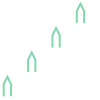

In [49]:
from shapely.geometry import MultiLineString

Mlin = []
for i in range(0,61,20):
    Mlin.append(LineString([coord for coord in zip(X+i, Y+i)]))

print(Mlin)
Mline = MultiLineString(Mlin)

Mline

## Unzip Data

- Below is a .zip file of census sub-divisions from Simply Analytics.
- We need to unzip it and inspect the metadata

In [50]:
import zipfile
Shape_file='SimplyAnalytics_Shapefiles_2021-11-18_02_24_45_8483b3a2bdad04d76a370657ccde2675'
with zipfile.ZipFile('data/'+Shape_file+'.zip', 'r') as zip_ref:
    zip_ref.extractall('data/Census/')
# print()
meta_data = pd.read_csv('data/Census/variable_names.txt',header=None,sep='#')
print(meta_data.values)

[['VALUE0\t'
  ' Household Population by Aboriginal Identity | Household Population For Aboriginal Identity | Aboriginal Identity, 2021']
 ['VALUE1\t' ' Basics | Total Population, 2021']
 ['VALUE2\t'
  ' Household Population by Visible Minority Status | Household Population For Visible Minority | Visible Minority Total, 2021']]


## Reading the shapefile

We can rely on [geopandas](https://geopandas.org/en/stable/), a spatial extension for pandas.  We can use Geopandas to read, manipulate, and write geospatial data.

In [51]:
import geopandas as gpd

# the .read_file() function reads shapefiles
BC_Sub_Div = gpd.read_file('data/Census/'+Shape_file+'.shp')

meta_data = pd.read_csv('data/Census/variable_names.txt',header=None,sep='#')
print('Vrriable Names: \n',meta_data.values)

BC_Sub_Div

Vrriable Names: 
 [['VALUE0\t'
  ' Household Population by Aboriginal Identity | Household Population For Aboriginal Identity | Aboriginal Identity, 2021']
 ['VALUE1\t' ' Basics | Total Population, 2021']
 ['VALUE2\t'
  ' Household Population by Visible Minority Status | Household Population For Visible Minority | Visible Minority Total, 2021']]


,spatial_id,name,VALUE0,VALUE1,VALUE2,geometry
0,5901003,"Elkford, BC (CSD)",143.0,2628.0,94.0,"MULTIPOLYGON (((-114.89315 50.09667, -114.8884..."
1,5901006,"Sparwood, BC (CSD)",296.0,3999.0,253.0,"MULTIPOLYGON (((-114.62564 49.47787, -114.6253..."
2,5901012,"Fernie, BC (CSD)",316.0,5812.0,180.0,"POLYGON ((-115.06850 49.52620, -115.06747 49.5..."
3,5901017,"East Kootenay A, BC (CSD)",139.0,2051.0,8.0,"POLYGON ((-115.17497 50.56136, -115.17355 50.5..."
4,5901019,"East Kootenay B, BC (CSD)",120.0,2179.0,6.0,"POLYGON ((-115.22315 49.51682, -115.21258 49.5..."
...,...,...,...,...,...,...
732,5959007,"Northern Rockies, BC (CSD)",1110.0,4092.0,301.0,"POLYGON ((-127.71250 60.00003, -127.70000 60.0..."
733,5959805,"Fontas 1, BC (CSD)",2.0,4.0,0.0,"POLYGON ((-121.71239 58.28125, -121.71376 58.2..."
734,5959806,"Fort Nelson 2, BC (CSD)",360.0,405.0,0.0,"POLYGON ((-122.55333 58.83075, -122.56112 58.8..."
735,5959809,"Kahntah 3, BC (CSD)",0.0,0.0,0.0,"POLYGON ((-120.91042 58.35640, -120.91054 58.3..."


## Editing Data

In [52]:

## Note - This is the terminology used by the census
## It can be found in the variable_name file that comes with the download
BC_Sub_Div = BC_Sub_Div.rename(columns={
'VALUE0': 'Indigenous Identity',
'VALUE1': 'Population',
'VALUE2': 'Visible Minority'
})

BC_Sub_Div.head()

,spatial_id,name,Indigenous Identity,Population,Visible Minority,geometry
0,5901003,"Elkford, BC (CSD)",143.0,2628.0,94.0,"MULTIPOLYGON (((-114.89315 50.09667, -114.8884..."
1,5901006,"Sparwood, BC (CSD)",296.0,3999.0,253.0,"MULTIPOLYGON (((-114.62564 49.47787, -114.6253..."
2,5901012,"Fernie, BC (CSD)",316.0,5812.0,180.0,"POLYGON ((-115.06850 49.52620, -115.06747 49.5..."
3,5901017,"East Kootenay A, BC (CSD)",139.0,2051.0,8.0,"POLYGON ((-115.17497 50.56136, -115.17355 50.5..."
4,5901019,"East Kootenay B, BC (CSD)",120.0,2179.0,6.0,"POLYGON ((-115.22315 49.51682, -115.21258 49.5..."


## Plotting the Data

- Display the data and inspect the projection

No handles with labels found to put in legend.


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

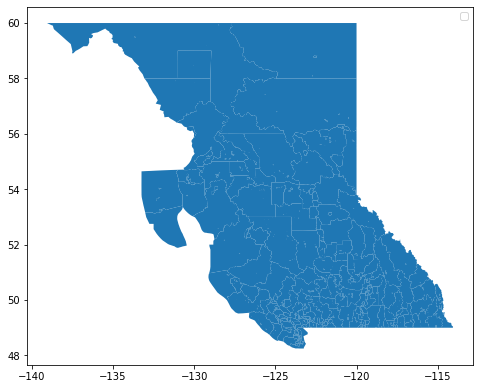

In [53]:
fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div.plot(ax=ax)
ax.legend()

BC_Sub_Div.crs

## Re-project the Data

No handles with labels found to put in legend.


<Projected CRS: EPSG:3005>
Name: NAD83 / BC Albers
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - British Columbia.
- bounds: (-139.04, 48.25, -114.08, 60.01)
Coordinate Operation:
- name: British Columbia Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

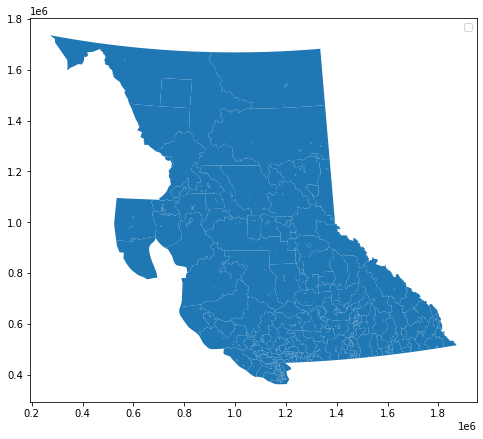

In [54]:
BC_Sub_Div_Albers = BC_Sub_Div.to_crs('EPSG:3005')

fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div_Albers.plot(ax=ax)
ax.legend()

BC_Sub_Div_Albers.crs

## Inspect the Geometry

In [66]:
BC_Sub_Div_Albers.area

0      1.102267e+08
1      1.938143e+08
2      1.427249e+07
3      4.629576e+09
4      2.857648e+09
           ...     
732    8.630355e+10
733    1.168956e+05
734    9.570580e+07
735    2.217388e+05
736    5.569671e+06
Length: 737, dtype: float64

## Map by a Column

<AxesSubplot:>

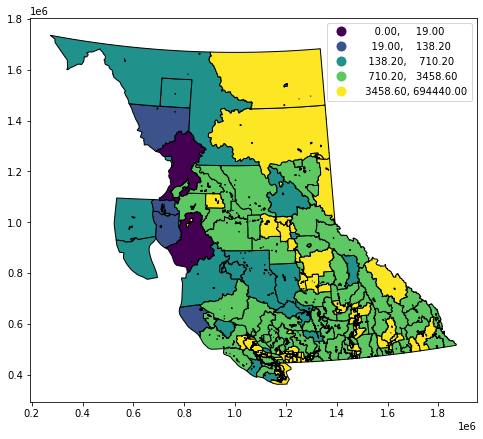

In [67]:
fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div_Albers.plot(column='Population',ax=ax,legend=True,scheme="quantiles",edgecolor='k')

## Clipping Data

In [ ]:
# BC_Boundary.to_file('Data/Census/BC_Boudary_File.shp')
BC_Boundary = gpd.read_file('Data/Census/BC_Boudary_File.shp')

fig,ax = plt.subplots(1,2,figsize=(8,5))
BC_Sub_Div_Albers.plot(edgecolor='k',ax=ax[0])
BC_Boundary.plot(edgecolor='k',ax=ax[1])

ax[0].set_title('Input Layer')
ax[1].set_title('Clip Layer')


BC_Sub_Div_Clip = gpd.clip(BC_Sub_Div_Albers,BC_Boundary)

fig,ax = plt.subplots(figsize=(5,7))
BC_Sub_Div_Clip.plot(edgecolor='k',ax=ax)
ax.set_title('Final Result')

## Calculate Population Density

(400000.0, 600000.0)

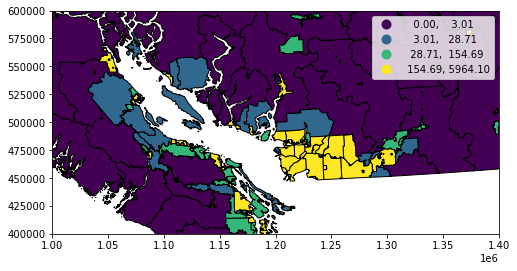

In [59]:
BC_Sub_Div_Clip['Pop_Density'] = BC_Sub_Div_Clip['Population']/BC_Sub_Div_Clip.area*1e6
BC_Sub_Div_Clip['Pop_Density']=BC_Sub_Div_Clip['Pop_Density'].fillna(0)

fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div_Clip.plot(column='Pop_Density',ax=ax,legend=True,scheme="User_Defined", 
         classification_kwds=dict(bins=[
             BC_Sub_Div_Clip['Pop_Density'].quantile(.25),
             BC_Sub_Div_Clip['Pop_Density'].quantile(.5),
             BC_Sub_Div_Clip['Pop_Density'].quantile(.75),
             BC_Sub_Div_Clip['Pop_Density'].max()]),
                    edgecolor='k')

ax.set_xlim(1e6,1.4e6)
ax.set_ylim(4e5,6e5)

# BC_Sub_Div_Clip.to_file('data//BC_Sub_Divisions.shp')

## Data Classification

Community Type Summary BC
Community_Type
Medium Poulation Center      9
Large Urban Center          11
Small Poulation Center      44
Rural                      673
Name: name, dtype: int64


Text(0.5, 1.0, 'Community Type SW BC')

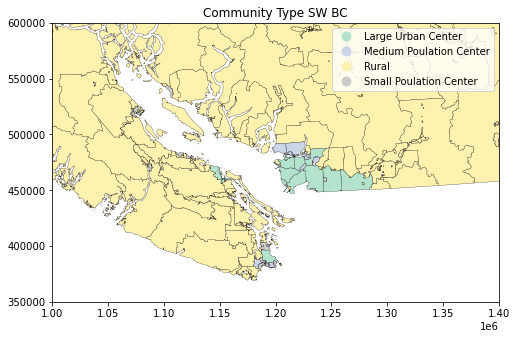

In [60]:
BC_Sub_Div_Clip.loc[((BC_Sub_Div_Clip['Pop_Density']<=400)|(BC_Sub_Div_Clip['Population']<=1000)),
                    'Community_Type']='Rural'

BC_Sub_Div_Clip.loc[((BC_Sub_Div_Clip['Community_Type']!='Rural')&(BC_Sub_Div_Clip['Population']<30000)),
                    'Community_Type']='Small Poulation Center'

BC_Sub_Div_Clip.loc[((BC_Sub_Div_Clip['Community_Type']!='Rural')&(BC_Sub_Div_Clip['Population']>=100000)),
                    'Community_Type']='Large Urban Center'

BC_Sub_Div_Clip.loc[((BC_Sub_Div_Clip['Community_Type']!='Rural')&(BC_Sub_Div_Clip['Population']>=30000)&
                     (BC_Sub_Div_Clip['Population']<100000)),
                    'Community_Type']='Medium Poulation Center'

print('Community Type Summary BC')
print(BC_Sub_Div_Clip.groupby('Community_Type').count()['name'].sort_values())


fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div_Clip.plot(column='Community_Type',ax=ax,legend=True,cmap='Pastel2',edgecolor='k',linewidth=.25)

ax.set_xlim(1e6,1.4e6)
ax.set_ylim(3.5e5,6e5)

ax.set_title('Community Type SW BC')



# Saving Data

## Shapefiles

We can save new layer as a shapefile.  Note the **"UserWarning"**
* [Shapefiles](https://en.wikipedia.org/wiki/Shapefile) are only one type of vector file.  They have certain restrictions to minimize storage space (eg. limiting column names), they aren't human readable, and they split the data into multiple files.

In [61]:
BC_Sub_Div_Clip.to_file('data/Outputs/BC_Sub_Divisions.shp')

C:\Users\User\AppData\Local\Temp/ipykernel_10560/165744027.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  BC_Sub_Div_Clip.to_file('data/Outputs/BC_Sub_Divisions.shp')


## Geojson

We can save the new layer as a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file to get around the issue.
* This is a simple file type often used in web-centered applications that stores data as a **human readable** dictionary.
* The file takes up more space, but is also a bit more accessible/flexible.


In [62]:
BC_Sub_Div_Clip.to_file("data/Outputs/BC_Sub_Div.json", driver = "GeoJSON")